In [2]:
#Shishir Khanal
#CMU-Optimal Controls from Jack Manchester
#Minimization: Inequality Constraints

In [3]:
import Pkg;
Pkg.activate(@__DIR__);
Pkg.instantiate();

Pkg.add("LinearAlgebra");
Pkg.add("PyPlot");
Pkg.add("ForwardDiff");

using LinearAlgebra;
using PyPlot;
using ForwardDiff;

  Activating project at `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints/Project.toml`
  No Changes to `~/Documents/Optimal_Control/Sims/Optimization/Inequality_Constraints/Manifest.toml`


In [4]:
Q = Diagonal([0.5; 1])
#Quadratic Objective Function
function f(x)
    return 0.5*(x-[1; 0])'*Q*(x-[1; 0])
end

function ∇f(x)
    return Q*(x-[1; 0])
end

function ∇2f(x)
    return Q
end

∇2f (generic function with 1 method)

In [5]:
#Linear Inequalities
A = [1.0 -1.0]
b = -1.0
function c(x)
    return dot(A,x) - b
end
function δc(x)
    return A
end

δc (generic function with 1 method)

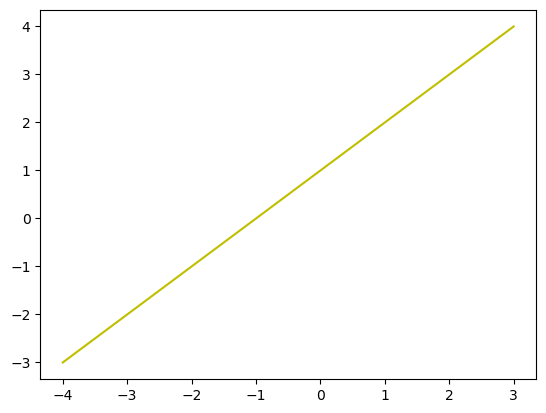

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f49cdeb1eb0>

In [6]:
function plot_landscape()
    Nsamp = 20
    Xsamp = kron(ones(Nsamp), LinRange(-4,4,Nsamp)')
    Ysamp = kron(ones(Nsamp)', LinRange(-4,4,Nsamp))
    Zsamp = zeros(Nsamp, Nsamp)
    for j = 1:Nsamp
        for k = 1:Nsamp
            Zsamp[j,k] = f([Xsamp[j,k]; Ysamp[j,k]])
        end
    end
    #positive definite hessian so level curve looks like a bowl
    #contour(Xsamp, Ysamp, Zsamp)
    
    xc = LinRange(-4, 3, Nsamp)
    #Quadratic Equality Constraint
    plot(xc, xc.+1, "y")
end

plot_landscape()

In [7]:
function La(x,λ,ρ)
    ρ = max(0,c(x))
    return f(x) + λ*ρ + (ρ/2)*(ρ'*ρ)
end

La (generic function with 1 method)

In [8]:
function newton_solve(x0,λ,ρ)
    x = x0
    ρ = max.(0,c(x))
    C = zeros(1,2)
    if c(x) ≥ 0
        C = δc(x)
    end
    g = ∇f(x) + (λ+ρ*ρ)*C'
    while norm(g) ≥ 1e-8
        H = ∇2f(x) + ρ*C'*C
        Δx = -H\g
        
        x = x+Δx
        
        p = max.(0, c(x))
        C = zeros(1,2)
        if c(x) ≥ 0
            C = δc(x)
        end
        g = ∇f(x) + (λ+ρ*ρ)*C'
    end
    
    return x
end

newton_solve (generic function with 1 method)

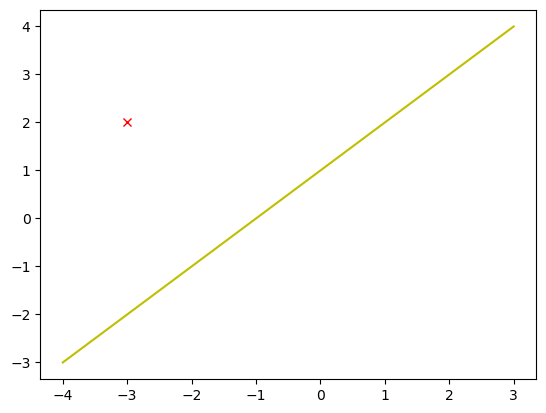

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f49cd043dc0>

In [9]:
xguess = [-3; 2]
λguess = [0.0]
ρ = 1.0
plot_landscape()
plot(xguess[1], xguess[2], "rx")

In [ ]:
xnew = newton_solve(xguess[:,end], λguess[end], ρ)
λnew = max.(0, λguess[end]+ρ*c(xnew))
xguess = [xguess xnew]
#λguess = [λguess λnew]
#ρ = 10*ρ
plot_landscape()
plot(xguess[1,:], xguess[2,:], "rx")